# Approach 3: Combination of Blending Images and Gaussian Filtering on Model 3

In such an approach, 2 images of the same label are blended and then Gaussian Filtering is done on the image 
obtained after blending.

In [19]:
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random, os
import h5py
from sklearn.metrics import accuracy_score
import sys
import tensorflow as tf

# Examples of Combination of Blending Images and Gaussian Filtering

In [2]:
image_1="/home/pulkit/Downloads/GTSRB/Training/00002/00035_00024.ppm"
image_2="/home/pulkit/Downloads/GTSRB/Training/00002/00000_00024.ppm"

In [3]:
img_1=cv2.imread(image_1)
img_2=cv2.imread(image_2)
#img1=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
#img1=cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

In [4]:
alpha=0.5
beta=0.3
gamma=0.2

img_1 = np.asarray(img_1)
img_1 = cv2.resize(img_1, (32, 32))
#img_1 = preprocessing(img_1)

img_2 = np.asarray(img_2)
img_2 = cv2.resize(img_2, (32, 32))
#img_2 = preprocessing(img_2)

2 images are blended using the formula- (alpha * image1) + (beta * image2) + gamma
after blending Gaussian Filer of height 5 and width 5 is applied on it.

In [5]:
output=cv2.addWeighted(img_1,alpha,img_2,beta,gamma)  #blending 2 images
output_gauss = cv2.GaussianBlur(output,(5,5),0)       # applying Gaussian Blur

Text(0.5, 1.0, 'Image obtaines after applying Gausian filter')

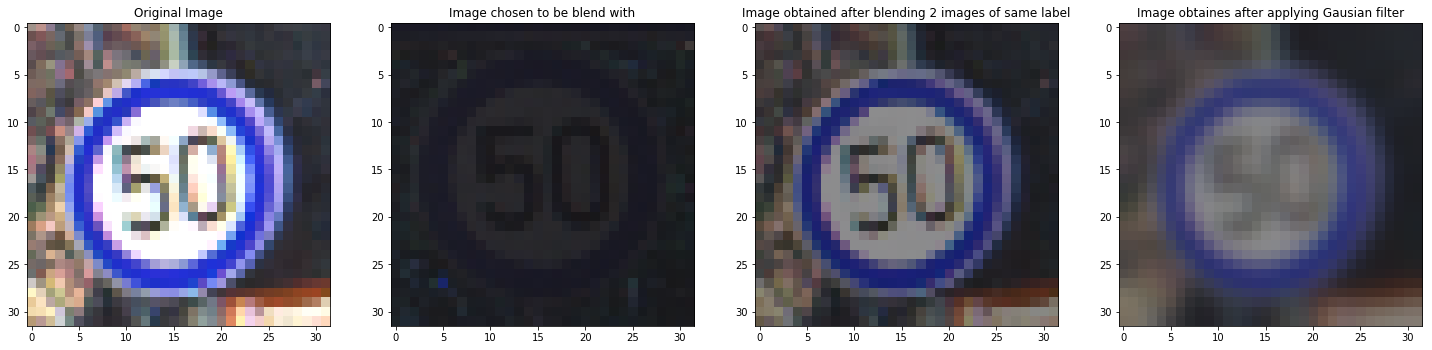

In [6]:
f, axarr = plt.subplots(1,4,figsize=(25,25))
axarr[0].imshow(img_1)
axarr[0].set_title("Original Image")
axarr[1].imshow(img_2)
axarr[1].set_title("Image chosen to be blend with")
axarr[2].imshow(output)
axarr[2].set_title("Image obtained after blending 2 images of same label")
axarr[3].imshow(output_gauss)
axarr[3].set_title("Image obtaines after applying Gausian filter")

In [7]:
image_1="/home/pulkit/Downloads/GTSRB/Training/00005/00000_00026.ppm"
image_2="/home/pulkit/Downloads/GTSRB/Training/00005/00004_00008.ppm"

In [8]:
img_1=cv2.imread(image_1)
img_2=cv2.imread(image_2)

In [9]:
alpha=0.5
beta=0.3
gamma=0.2

img_1 = np.asarray(img_1)
img_1 = cv2.resize(img_1, (32, 32))


img_2 = np.asarray(img_2)
img_2 = cv2.resize(img_2, (32, 32))

In [10]:
output=cv2.addWeighted(img_1,alpha,img_2,beta,gamma)  #blending 2 images
output_gauss = cv2.GaussianBlur(output,(5,5),0)       # applying Gaussian Blur

Text(0.5, 1.0, 'Image obtaines after applying Gausian filter')

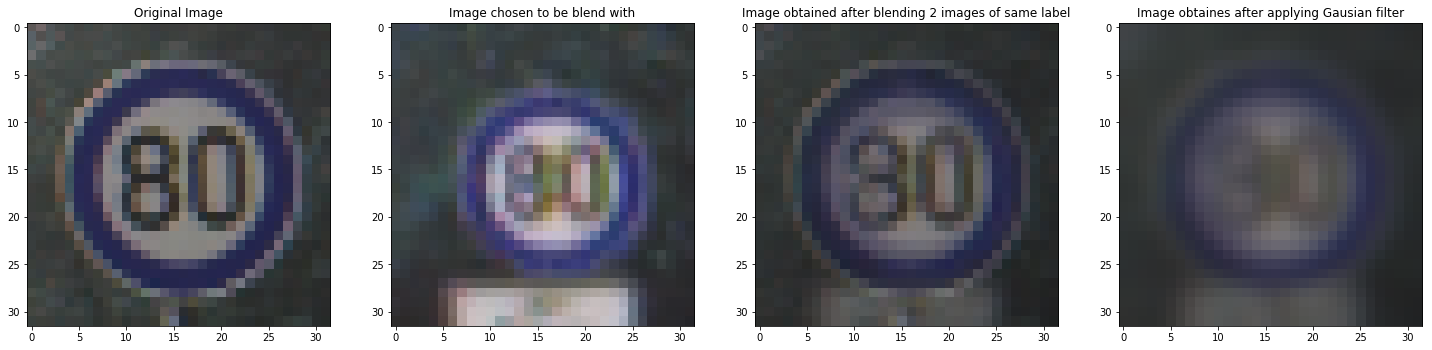

In [11]:
f, axarr = plt.subplots(1,4,figsize=(25,25))
axarr[0].imshow(img_1)
axarr[0].set_title("Original Image")
axarr[1].imshow(img_2)
axarr[1].set_title("Image chosen to be blend with")
axarr[2].imshow(output)
axarr[2].set_title("Image obtained after blending 2 images of same label")
axarr[3].imshow(output_gauss)
axarr[3].set_title("Image obtaines after applying Gausian filter")

# Testing on 200 images

At this step we will define two functions- choose_folder() and image_path() which helps us by, taking two random images from the dataset and testing it.

In [20]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random, os
import h5py
from sklearn.metrics import accuracy_score
import sys
def choose_folder():
    folder_label=["00001","00002","00003","00004","00005","00006","00007",
                   "00008","00009","00010","00011","00012","00013","00014",
                    "00015","00016","00017","00018","00019","00020","00021",
                     "00022","00023","00024","00025","00026","00027","00028",
                     "00029","00030","00031","00032","00033","00034","00035",
                      "00036","00037","00038","00039","00040","00041","00042"]
    
    folder=random.choice(folder_label)
    return folder


def image_path():
    folder=choose_folder()
    print("****************************************************************************")
    print("the label is",folder)
    path = r"/home/pulkit/Downloads/GTSRB/Training/"
    path=path+folder+"/"
    #print("the path is ",path)
    my_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
    p=os.path.join(path, my_image)
    return p,folder

At this step, we will define the fuctions which will be important to process the image.

In [21]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
    img = img/255
    return img

Now, we will define a function which will apply 2 fuctions on the images-
 
1) Blending two images using the formula (alpha * image1) + (beta * image2) + gamma

2) Gaussian Blur with a kernel of height 5 and width 5

The model predicts the label for every image. At last, an accuracy score is calculated.

In [37]:
def image_process():
    # getting the model
    model = tf.keras.models.load_model('/home/pulkit/Desktop/trained/noLoss_model.h5')
    
    
    y_true=[]
    y_pred=[]
    
    for i in range(0,200,1):
        # testing on 50 images
        path_A,label=image_path()
        A = cv2.imread(path_A,1)
        y_true.append(int(label))
        print(path_A)
        
        path_for_B=r"/home/pulkit/Downloads/GTSRB/Training/"+label+"/"
        my_image_B = random.choice([
        x for x in os.listdir(path_for_B)
        if os.path.isfile(os.path.join(path_for_B, x))
        ])
        path_B=os.path.join(path_for_B, my_image_B)
        
        #path_B=second_max(path_A)
        B = cv2.imread(path_B,1)
        alpha=0.5
        beta=0.3
        gamma=0.2
        
        A = np.asarray(A)
        A = cv2.resize(A, (32, 32))
        
        
        B = np.asarray(B)
        B = cv2.resize(B, (32, 32))
        
        
        # blending two images of the same label
        output=cv2.addWeighted(A,alpha,B,beta,gamma)
        
        # applying gaussian fiter on the blended image
        output = cv2.GaussianBlur(output,(5,5),0)
        
        
        # preprocessing the image, so that the model can predict
        
        output= tf.cast(output, tf.float32)/255
        output = tf.image.resize(output, (32, 32))
        output = tf.expand_dims(output , 0)
        
        
        
        pred=int(model.predict_classes(output))
        print("The predicted label is ",pred)
        y_pred.append(pred)
                 
    print("****************************************************************************")        
    correct_percent=accuracy_score(y_true, y_pred)
    print("The accuracy score is ",correct_percent)
    


In [35]:
image_process()

****************************************************************************
the label is 00005
/home/pulkit/Downloads/GTSRB/Training/00005/00039_00022.ppm
The predicted label is  5
****************************************************************************
the label is 00004
/home/pulkit/Downloads/GTSRB/Training/00004/00018_00003.ppm
The predicted label is  4
****************************************************************************
the label is 00003
/home/pulkit/Downloads/GTSRB/Training/00003/00020_00012.ppm
The predicted label is  5
****************************************************************************
the label is 00010
/home/pulkit/Downloads/GTSRB/Training/00010/00001_00007.ppm
The predicted label is  5
****************************************************************************
the label is 00011
/home/pulkit/Downloads/GTSRB/Training/00011/00019_00014.ppm
The predicted label is  30
****************************************************************************
the label is

The predicted label is  32
****************************************************************************
the label is 00016
/home/pulkit/Downloads/GTSRB/Training/00016/00000_00004.ppm
The predicted label is  16
****************************************************************************
the label is 00040
/home/pulkit/Downloads/GTSRB/Training/00040/00003_00019.ppm
The predicted label is  40
****************************************************************************
the label is 00016
/home/pulkit/Downloads/GTSRB/Training/00016/00007_00004.ppm
The predicted label is  16
****************************************************************************
the label is 00011
/home/pulkit/Downloads/GTSRB/Training/00011/00013_00029.ppm
The predicted label is  5
****************************************************************************
the label is 00019
/home/pulkit/Downloads/GTSRB/Training/00019/00003_00024.ppm
The predicted label is  31
***********************************************************

The predicted label is  27
****************************************************************************
the label is 00019
/home/pulkit/Downloads/GTSRB/Training/00019/00001_00028.ppm
The predicted label is  19
****************************************************************************
the label is 00022
/home/pulkit/Downloads/GTSRB/Training/00022/00003_00011.ppm
The predicted label is  22
****************************************************************************
the label is 00006
/home/pulkit/Downloads/GTSRB/Training/00006/00005_00016.ppm
The predicted label is  6
****************************************************************************
the label is 00041
/home/pulkit/Downloads/GTSRB/Training/00041/00001_00014.ppm
The predicted label is  41
****************************************************************************
the label is 00030
/home/pulkit/Downloads/GTSRB/Training/00030/00008_00024.ppm
The predicted label is  30
***********************************************************

The predicted label is  30
****************************************************************************
the label is 00012
/home/pulkit/Downloads/GTSRB/Training/00012/00021_00012.ppm
The predicted label is  12
****************************************************************************
the label is 00022
/home/pulkit/Downloads/GTSRB/Training/00022/00008_00023.ppm
The predicted label is  22
****************************************************************************
the label is 00018
/home/pulkit/Downloads/GTSRB/Training/00018/00001_00001.ppm
The predicted label is  18
****************************************************************************
the label is 00010
/home/pulkit/Downloads/GTSRB/Training/00010/00014_00012.ppm
The predicted label is  5
****************************************************************************
the label is 00012
/home/pulkit/Downloads/GTSRB/Training/00012/00043_00000.ppm
The predicted label is  12
***********************************************************

The predicted label is  19
****************************************************************************
the label is 00005
/home/pulkit/Downloads/GTSRB/Training/00005/00035_00010.ppm
The predicted label is  5
****************************************************************************
the label is 00003
/home/pulkit/Downloads/GTSRB/Training/00003/00031_00029.ppm
The predicted label is  3
****************************************************************************
the label is 00028
/home/pulkit/Downloads/GTSRB/Training/00028/00006_00019.ppm
The predicted label is  28
****************************************************************************
the label is 00036
/home/pulkit/Downloads/GTSRB/Training/00036/00008_00008.ppm
The predicted label is  36
****************************************************************************
the label is 00015
/home/pulkit/Downloads/GTSRB/Training/00015/00001_00004.ppm
The predicted label is  14
************************************************************

Conclusion-: After blending two images of the same label and applying Gaussian Fitering,we can observe that
the prediction accuracy of the model is decreased from 93% to 66.5%. 
In order to further decrease the the prediction accuracy, we can apply the Gaussian Filtering once more or we 
can do more blending on already filtered image.Further applying Gaussian Filtering or blending the image 
will make the quality of the image so bad, that even the human eye will not be able to recognize it.

Note-: The quality of the image obtained after FGSM attack, is far superior than obtained by the 
combination of blending images and applying gaussian filter.